## 12. Time Series Models of Heteroscedascity

**Exercise 12.1**.  Display the time sequence plot of the absolute returns for the CREF data.  Repeat the plot with the squared returns. Comment on the volatility patterns observed in these plots.  (The data are in file named `CREF`.)

**Solution**.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Y = np.array(pd.read_csv('../data/CREF.dat')['CREF'])

logY = np.log(Y)
r = logY[1:] - logY[:-1]

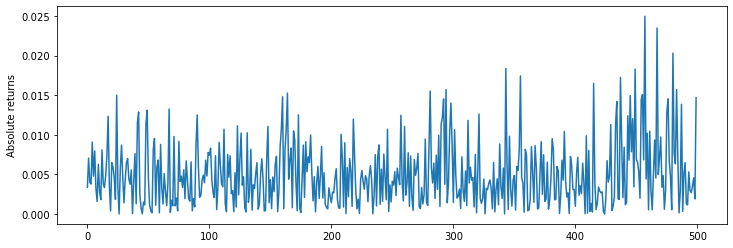

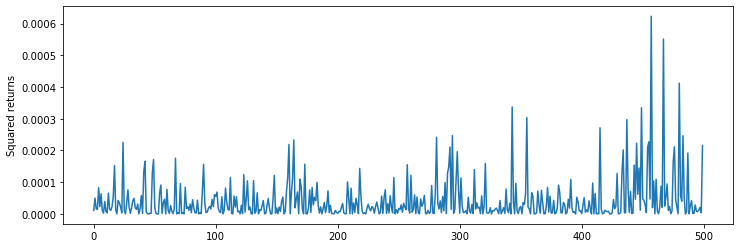

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(r))
plt.ylabel('Absolute returns')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(r**2)
plt.ylabel('Squared returns')
plt.show()

Volatility clustering can be observed in both plots, though it is visually more obvious on the squared returns plot.

**Exercise 12.2**.  Plot the time sequence plot of the absolute returns for the USD/HKD exchange rate data.  Repeat the plot with the squared returns.  Comment on the volatility patterns observed in these plots.  (The data are in the file named `usd.hkd`.)

**Solution**.

In [4]:
r = np.array(pd.read_csv('../data/usd.hkd.dat', sep=' ')['r'])

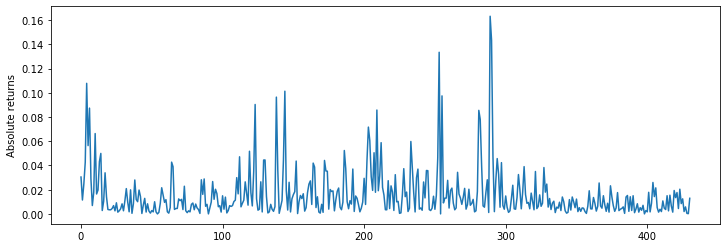

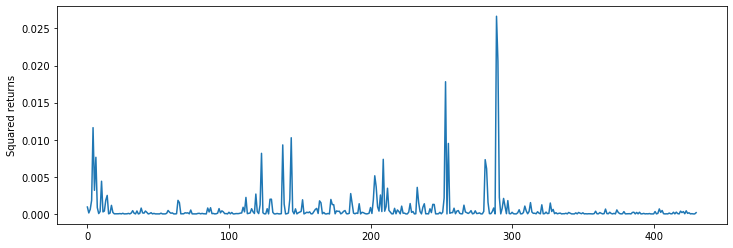

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(r))
plt.ylabel('Absolute returns')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(r**2)
plt.ylabel('Squared returns')
plt.show()

Volatility clustering is evident in both charts.

**Exercise 12.3**.  Use the definition $\eta_t = r_t^2 - \sigma_{t | t - 1}^2$ \[Equation (12.2.4) on page 287\] and show that $\{ \eta_t \}$ is a serially uncorrelated sequence.  Show also that $\eta_t$ is uncorrelated with past squared returns, that is, show that $\text{Corr}[\eta_t, r^2_{t - k}] = 0$ for $k > 0$.

**Solution**.  We have:

$$ 
\begin{align}
\text{E}[\eta_t] &= \text{E}[r_t^2 - \sigma_{t | t-1}^2] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1)] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 \cdot 0 ] \\
&= 0
\end{align}
$$

and for $k > 0$

$$ 
\begin{align}
\text{E}[\eta_t \eta_{t - k}] &= \text{E}[(r_t^2 - \sigma_{t | t-1}^2)(r_{t-k}^2 - \sigma_{t - k | t-k-1}^2)] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) \cdot (r_{t-k}^2 - \sigma_{t - k | t-k-1}^2)] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) (\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) \cdot 0 ] \\
&= 0
\end{align}
$$

Therefore,

$$ \text{Cov}[\eta_t, \eta_{t - k}] = \text{E}[\eta_t \eta_{t - k}] - \text{E}[\eta_t] \text{E}[\eta_{t-k}] = 0 $$

and so the $\{ \eta_t \}$ is serially uncorrelated.

We also have

$$ 
\begin{align}
\text{E}[\eta_t r_{t - k}^2] &= \text{E}[(r_t^2 - \sigma_{t | t-1}^2) r_{t-k}^2] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) \cdot r_{t-k}^2 ] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 (\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 \cdot 0 ] \\
&= 0
\end{align}
$$

and so

$$ \text{Cov}[\eta_t, r_{t - k}^2] = \text{E}[\eta_t r_{t - k}^2] - \text{E}[\eta_t] \text{E}[r_{t-k}^2] = 0 $$

which is the desired result.

**Exercise 12.4**.  Substituting $\sigma_{t | t - 1}^2 = r_t^2 - \eta_t$ into Equation (12.2.2) on page 285 show the algebra that leads to Equation (12.2.5) on page 287.

**Solution**.  Equation (12.2.2) states

$$ \sigma_{t | t - 1}^2 = \omega + \alpha r_{t-1}^2 \tag{12.2.2} $$

The result follows immediately when replacing $\sigma_{t | t - 1}^2 = r_t^2 - \eta_t$ and adding $\eta_t$ to both sides,

$$ r_t^2 = \omega + \alpha r_{t-1}^2 + \eta_t \tag{12.2.5} $$

**Exercise 12.5**.  Verify Equation (12.2.8) on page 288.

**Solution**.  Equation (12.2.8) states

$$ \tau = \omega^2 + 2 \omega \alpha \sigma^2 + \alpha^2 3 \tau \tag{12.2.8} $$

Following the procedure of raising both sides of Equation (12.2.2) to the second power and taking expectation, we get

$$ \text{E}[\sigma_{t | t - 1}^4] = \text{E}[\omega^2 + 2 \alpha \omega r_{t-1}^2 + \alpha^2 r_{t-1}^4] $$

Using Equation (12.2.7), which states that $\text{E}[r_{t-1}^4] = 3 \tau$, we get

$$ \tau = \text{E}[\sigma_{t | t - 1}^4] = \omega^2 + 2 \alpha \omega \text{E}[r_{t-1}^2] + 3 \alpha^2 \tau $$

and from $\text{E}[r_{t-1}^2] = \sigma^2$ we get our result.

**Exercise 12.6**.  Without doing any theoretical calculations, order the kurtosis values of the following four distributions in ascending order: the t-distribution with 10 DF, the t-distribution with 30 DF, the uniform distribution on \[−1,1\], and the normal distribution with mean 0 and variance 4.  Explain your answer.

**Solution**.  The order is:

- Uniform distribution on \[-1, 1\]
- Normal distribution with mean 0 and variance 4
- t-distribution with 30 DF
- t-distribution with 10 DF

Kurtosis measures how "heavy" the tails of a distribution are.  The uniform distribution has no "tails" at all, as the PDF goes to zero outside of an interval, and the t-distribution has heavier tails than the normal distribution, with it becoming wider with smaller number of degrees of freedom.

**Exercise 12.7**.  Simulate a GARCH(1,1) process with α = 0.1 and β = 0.8 and of length 500. Plot the time series and inspect its sample ACF, PACF, and EACF. Are the data consistent with the assumption of white noise?

**(a)** Square the data and identify a GARCH model for the raw data based on the sample ACF, PACF, and EACF of the squared data.

**(b)** Identify a GARCH model for the raw data based on the sample ACF, PACF and EACF of the absolute data. Discuss and reconcile any discrepancy between the tentative model identified with the squared data and that with the absolute data.

**(c)** Perform the McLeod-Li test on your simulated series. What do you conclude?

**(d)** Repeat the exercise but now using only the first 200 simulated data. Discuss your findings.

**Solution**.

In [6]:
%%capture
%run garch_sim.py

In [7]:
np.random.seed(0)
Y = garch_sim(alpha=[0.01, 0.1], beta=0.8, n=500)

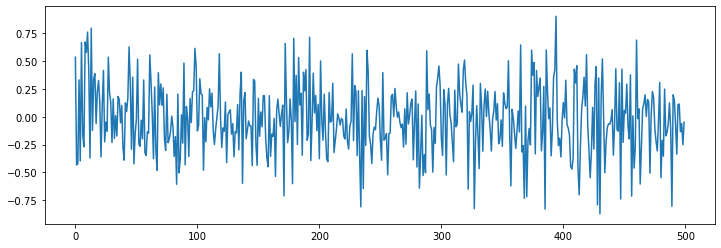

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

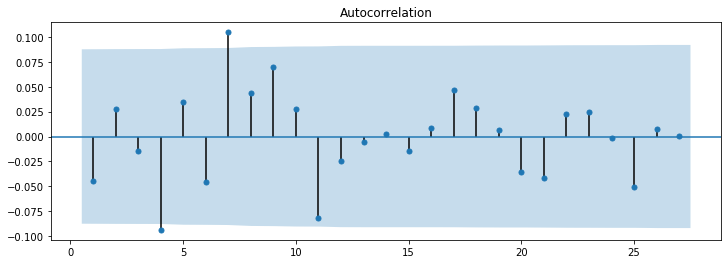

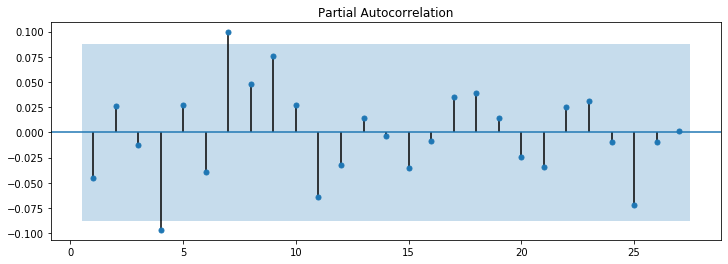

In [9]:
plt.figure(figsize=(12, 4))
plot_acf(Y, ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(Y, ax=plt.gca(), zero=False)
plt.show()

In [10]:
%%capture
%run eacf.py

In [11]:
_ = eacf(Y)

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  o  o  o  x  o  o  x  o  o  o  o  o  o  o
1  x  o  o  o  o  o  x  o  o  o  o  o  o  o
2  x  o  o  o  o  o  o  o  o  o  o  o  o  o
3  x  x  x  o  o  o  o  o  o  o  o  o  o  o
4  x  x  x  x  o  o  o  o  x  o  x  o  o  o
5  x  o  x  x  x  o  o  o  x  o  x  o  o  o
6  x  o  x  x  x  o  o  o  o  o  o  o  o  o
7  x  x  x  x  x  o  x  o  o  o  o  o  o  o


The data seems consistent with white noise.

**(a)**

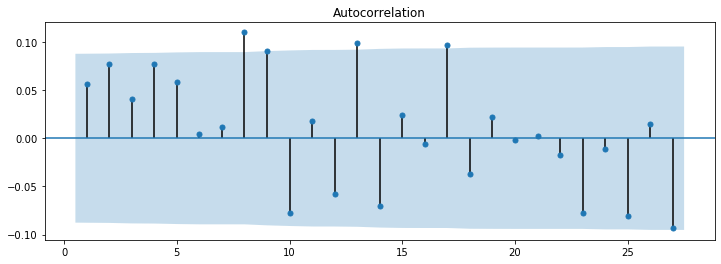

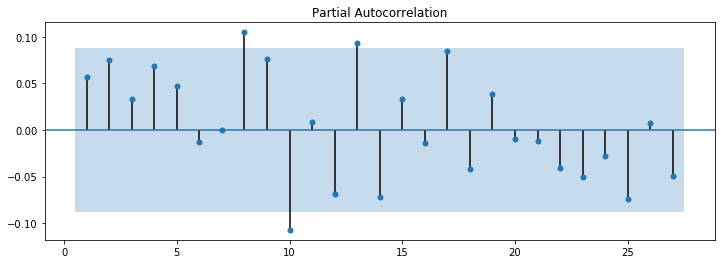

In [12]:
plt.figure(figsize=(12, 4))
plot_acf(Y**2, ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(Y**2, ax=plt.gca(), zero=False)
plt.show()

In [13]:
_ = eacf(Y**2)

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  o  o  o  o  o  o  o  x  o  o  o  o  x  o
1  x  o  o  o  o  o  o  o  x  o  o  o  o  o
2  x  x  o  o  o  o  o  o  o  x  o  o  o  o
3  x  x  x  o  o  o  o  o  o  o  o  o  o  o
4  x  x  x  x  o  o  o  o  o  o  o  o  o  o
5  x  o  x  x  o  o  o  o  o  o  o  o  o  o
6  x  o  x  x  o  o  o  o  o  o  o  o  o  o
7  o  x  x  o  x  o  x  o  o  o  o  o  o  o


The squared data seems to suggest white noise model for the squared series.

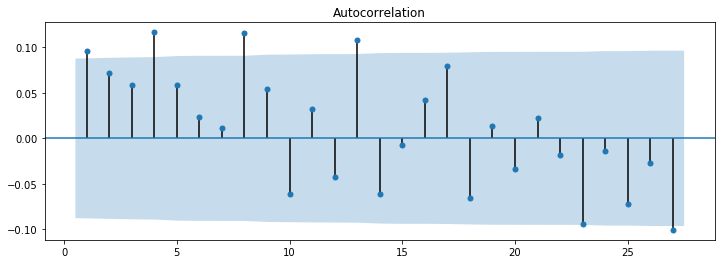

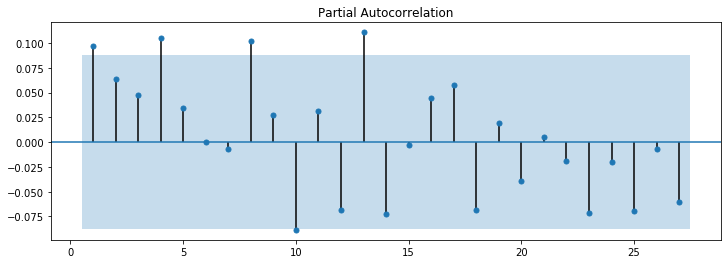

In [14]:
plt.figure(figsize=(12, 4))
plot_acf(np.abs(Y), ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(np.abs(Y), ax=plt.gca(), zero=False)
plt.show()

In [15]:
_ = eacf(np.abs(Y))

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  x  o  o  x  o  o  o  x  o  o  o  o  x  o
1  x  o  o  o  o  o  o  x  o  o  o  o  o  o
2  x  o  o  o  o  o  o  o  o  x  o  o  o  o
3  x  x  x  o  o  o  o  o  o  o  o  o  o  o
4  x  o  o  x  o  o  o  o  o  o  o  o  o  o
5  o  x  o  x  x  o  o  o  o  o  o  o  o  o
6  x  o  o  x  x  o  o  o  o  o  o  o  o  o
7  o  o  x  x  x  o  o  o  o  o  o  o  o  o


The absolute value of the data has the EACF suggesting an ARMA(1, 1) process for the absolute values of the series.

**(c)**

In [16]:
%%capture
%run mcleod_li_test.py

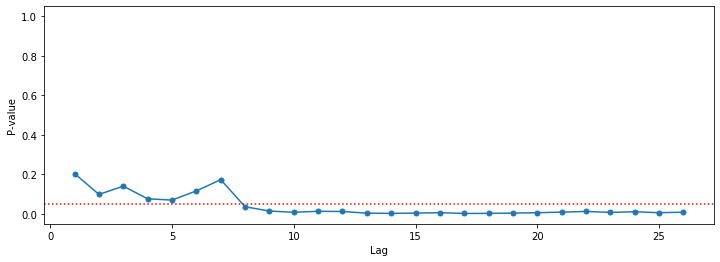

In [17]:
plt.figure(figsize=(12, 4))
_ = mcleod_li_test(y=Y)
plt.show()

The McLeod Li test shows strong evidence of heteroscedascity.

**(d)**

In [18]:
Yr = Y[:200]

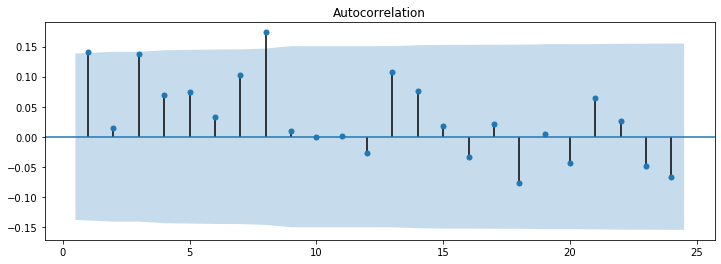

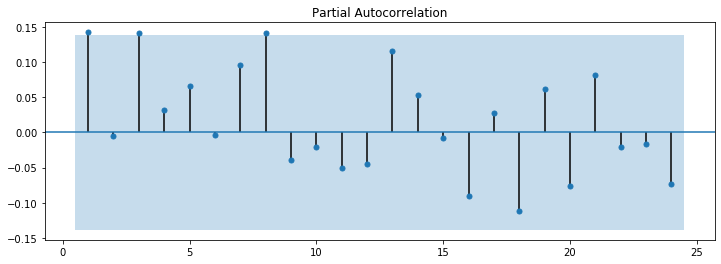

In [19]:
plt.figure(figsize=(12, 4))
plot_acf(Yr**2, ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(Yr**2, ax=plt.gca(), zero=False)
plt.show()

In [20]:
_ = eacf(Yr**2)

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  o  o  o  o  o  o  o  x  o  o  o  o  o  o
1  o  o  o  o  o  o  o  x  o  o  o  o  o  o
2  o  x  o  o  o  o  o  x  o  o  o  o  o  o
3  x  x  x  o  o  o  o  o  o  o  o  o  o  o
4  x  x  o  x  o  o  o  o  o  o  o  o  o  o
5  o  x  o  o  x  o  o  o  o  o  o  o  o  o
6  o  x  x  o  x  o  o  o  o  o  o  o  o  o
7  x  x  x  x  x  o  o  o  o  o  o  o  o  o


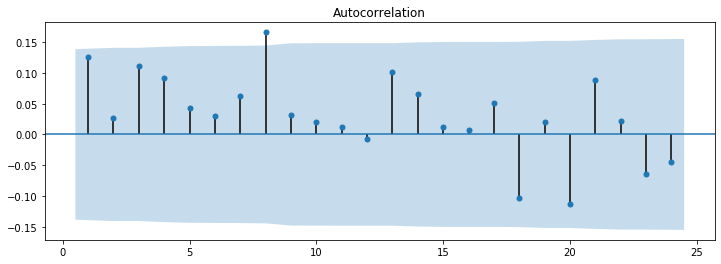

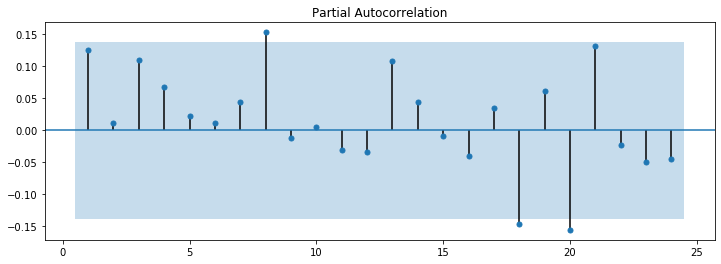

In [21]:
plt.figure(figsize=(12, 4))
plot_acf(np.abs(Yr), ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(np.abs(Yr), ax=plt.gca(), zero=False)
plt.show()

In [22]:
_ = eacf(np.abs(Yr))

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  o  o  o  o  o  o  o  x  o  o  o  o  o  o
1  o  o  o  o  o  o  o  o  o  o  o  o  o  o
2  o  x  o  o  o  o  o  o  o  o  o  o  o  o
3  x  o  x  o  o  o  o  o  o  o  o  o  o  o
4  x  x  o  o  o  o  o  o  o  o  o  o  o  o
5  x  o  o  o  x  o  o  o  o  o  o  o  o  o
6  x  o  o  o  x  o  o  o  o  o  o  o  o  o
7  x  o  o  x  x  x  x  o  o  o  o  o  o  o


The restricted data set is less expressive -- EACF fails to suggest the true model whether using the squared residuals or the absolute values of the residuals.

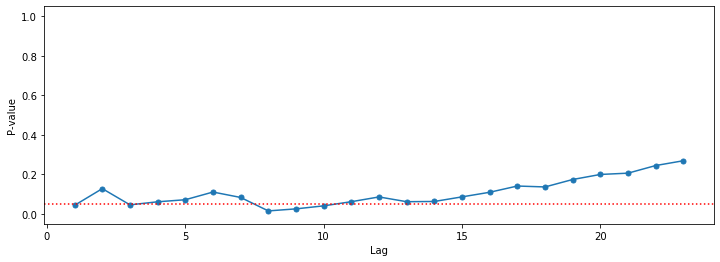

In [23]:
plt.figure(figsize=(12, 4))
_ = mcleod_li_test(y=Yr)
plt.show()

The test now shows only weak evidence of heteroscedascity.

**Exercise 12.8**.  The file `cref.bond` contains the daily price of the CREF bond fund from August 26, 2004 to August, 15, 2006. These data are available only on trading days, but proceed to analyze the data as if they were sampled regularly. 

**(a)** Display the time sequence plot of the daily bond price data and comment on the main features in the data.

**(b)** Compute the daily bond returns by log-transforming the data and then computing the first differences of the transformed data. Plot the daily bond returns, and comment on the result.

**(c)** Perform the McLeod-Li test on the returns series. What do you conclude?

**(d)** Show that the returns of the CREF bond price series appear to be independently and identically distributed and not just serially uncorrelated; that is, there is no discernible volatility clustering.

**Solution**.

In [24]:
Y = np.array(pd.read_csv('../data/cref.bond.dat')['cref.bond'])

**(a)**

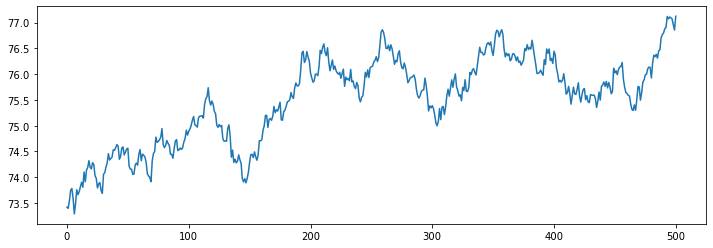

In [25]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

The series appears to be a random walk.

**(b)**

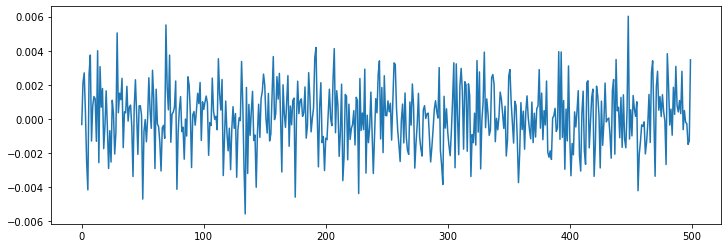

In [26]:
W = np.diff(np.log(Y))

plt.figure(figsize=(12, 4))
plt.plot(W)
plt.show()

The return series looks like white enoise -- with maybe a hint of heteroscedacity.

**(c)**

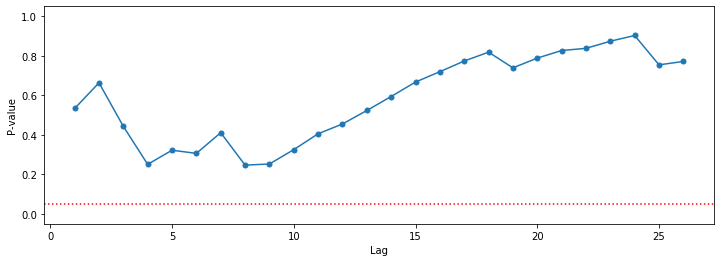

In [27]:
plt.figure(figsize=(12, 4))
_ = mcleod_li_test(y=W)
plt.show()

The McLeod-Li test fails to reject no heteroscedacity.

**(d)**

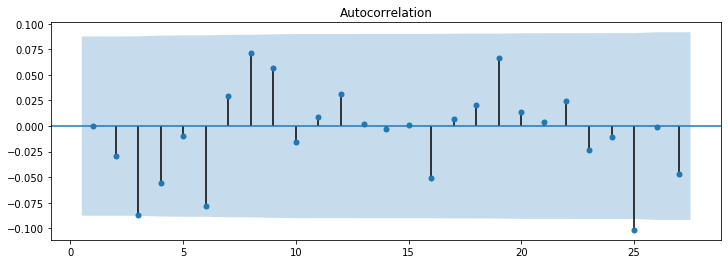

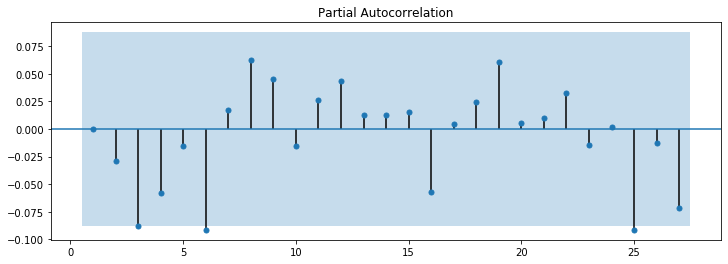

In [28]:
plt.figure(figsize=(12, 4))
plot_acf(np.abs(W), ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(np.abs(W), ax=plt.gca(), zero=False)
plt.show()

In [29]:
_ = eacf(np.abs(W))

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  o  o  o  o  o  o  o  o  o  o  o  o  o  o
1  o  o  o  o  o  o  o  o  o  o  o  o  o  o
2  x  x  o  o  o  o  o  o  o  o  o  o  o  o
3  x  x  x  o  o  o  o  o  o  o  o  o  o  o
4  x  x  x  x  o  x  o  o  o  o  o  o  o  o
5  x  x  x  x  x  o  o  o  o  o  o  o  o  o
6  x  x  x  o  x  x  o  o  o  o  o  o  o  o
7  x  x  x  o  x  o  o  o  o  o  o  o  o  o


ACF, PACF, and EACF suggest no autocorrelation on the absolute values of the returns.

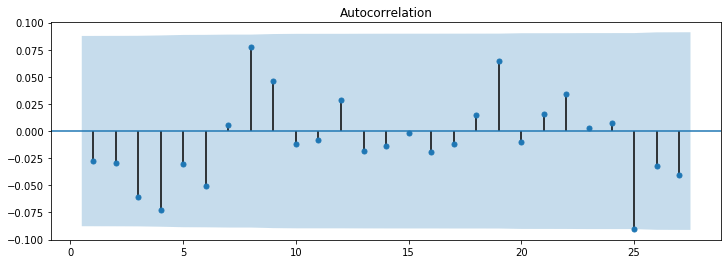

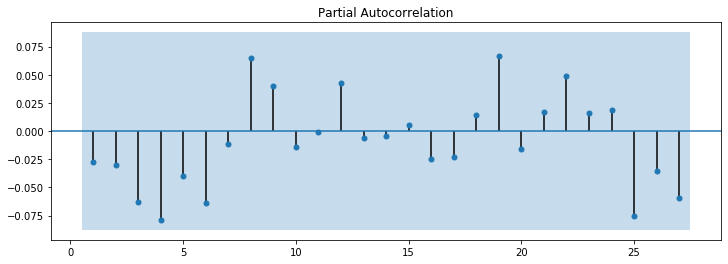

In [30]:
plt.figure(figsize=(12, 4))
plot_acf(W**2, ax=plt.gca(), zero=False)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(W**2, ax=plt.gca(), zero=False)
plt.show()

In [31]:
_ = eacf(W**2)

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  o  o  o  o  o  o  o  o  o  o  o  o  o  o
1  x  o  o  o  o  o  o  o  o  o  o  o  o  o
2  x  x  o  o  o  o  o  o  o  o  o  o  o  o
3  x  x  x  o  o  o  o  o  o  o  o  o  o  o
4  x  x  o  x  o  o  o  o  o  o  o  o  o  o
5  x  x  o  x  o  o  o  o  o  o  o  o  o  o
6  x  x  o  x  o  x  o  o  o  o  o  o  o  o
7  x  x  x  x  o  x  o  o  o  o  o  o  o  o


ACF, PACF, and EACF suggest no autocorrelation on the returns squared.

**Exercise 12.9**.  The daily returns of Google stock from August 20, 2004 to September 13, 2006 are stored in the file named `google`.

**(a)** Display the time sequence plot for the return data and show that the data are essentially uncorrelated over time.

**(b)** Compute the mean of the Google daily returns.  Does it appear to be significantly different from 0?

**(c)** Perform the McLeod-Li test on the Google daily returns series.  What do you conclude?

**(d)** Identify a GARCH model for the Google daily return data.  Estimate the identified model and perform model diagnostics with the fitted model.

**(e)** Draw and comment on the time sequence plot of the estimated conditional variances.

**(f)** Plot the QQ normal plot for the standardized residuals from the fitted model.  Do the residuals appear to be normal?  Discuss the effects of the normality on the model fit, for example, regarding the computation of the confidence interval.

**(g)** Construct a 95% confidence interval for b1.

**(h)** What are the stationary mean and variance according to the fitted GARCH model?  Compare them with those of the data.

**(i)** Based on the GARCH model, construct the 95% prediction intervals for h-step-ahead forecast, for $h = 1, 2, \dots, 5$.

**Solution**.

In [32]:
Y = pd.read_csv('../data/google.dat')['google']

**(a)**

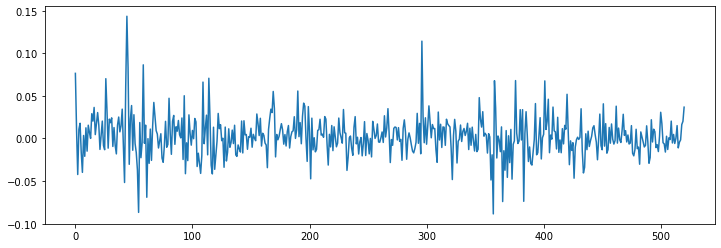

In [33]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

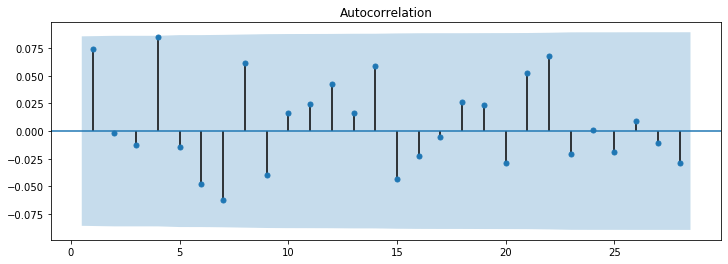

In [34]:
plt.figure(figsize=(12, 4))
plot_acf(Y, ax=plt.gca(), zero=False)
plt.show()

The series seems to be uncorrelated over time.

**(b)**

In [35]:
from scipy.stats import ttest_1samp

In [36]:
# Divide p-value by two since it is a one-tailed test
ttest_1samp(Y, 0).pvalue / 2

0.00523964496200428

A t-test indicates that the mean, 0.00269, is significantly different from zero.

**(c)**

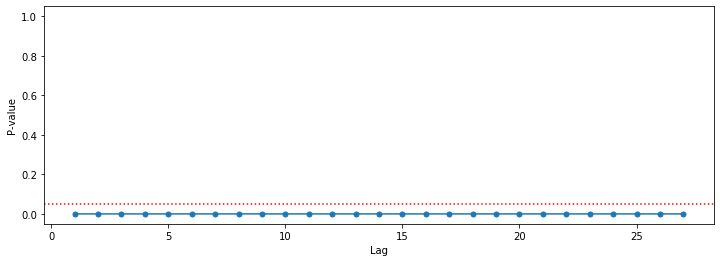

In [37]:
plt.figure(figsize=(12, 4))
_ = mcleod_li_test(y=Y)
plt.show()

The McLeod-Li test suggests significant ARCH effects.

**(d)**

In [38]:
_ = eacf(abs(Y));

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  x  x  x  o  o  o  x  o  o  x  o  o  x  x
1  x  o  o  o  o  o  o  o  o  o  o  o  o  x
2  x  x  o  o  o  o  o  o  o  o  o  o  o  x
3  x  x  x  o  o  o  o  o  o  o  o  o  o  x
4  x  o  x  o  o  o  o  o  o  o  o  o  o  o
5  x  o  x  o  x  o  o  o  o  o  o  o  o  o
6  o  x  x  x  x  x  o  o  o  o  o  o  o  o
7  x  o  x  x  x  o  x  o  o  o  o  o  o  o


In [39]:
_ = eacf(Y**2);

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  x  x  o  o  o  o  o  o  o  x  o  o  o  x
1  x  o  o  o  o  o  o  o  o  x  o  o  o  x
2  x  o  o  o  o  o  o  o  o  x  o  o  o  x
3  x  x  x  o  o  o  o  o  o  x  o  o  o  x
4  x  x  x  o  o  o  o  o  o  o  o  o  o  o
5  x  x  x  o  o  o  o  o  o  o  o  o  o  o
6  x  x  x  x  o  o  o  o  o  o  o  o  o  o
7  o  x  x  o  o  x  o  o  o  o  o  o  o  o


The EACF on the absolute returns and for the squared returns suggest an ARMA(1, 1) model, which suggests a GARCH(1, 1) model for the original return series.

In [40]:
from arch.univariate import arch_model

In [41]:
# Rescale manually
scale = 100
am = arch_model(scale * Y, p=1, q=1, mean='Constant', rescale=False)

res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1162.002848814021
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1161.957754926676
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 google   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1161.96
Distribution:                  Normal   AIC:                           2331.92
Method:            Maximum Likelihood   BIC:                           2348.94
                                        No. Observations:                  521
Date:                Thu, May 21 2020   Df Residuals:                      517
Time:                        13:41:48   Df Model:                            4
         

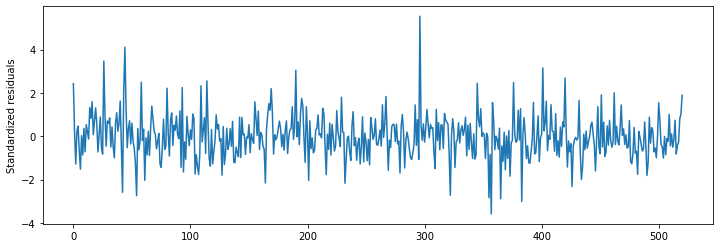

In [42]:
plt.figure(figsize=(12, 4))
plt.plot(res.std_resid)
plt.ylabel('Standardized residuals')
plt.show()

All coefficients are significant, and the residuals show no particular tendency.

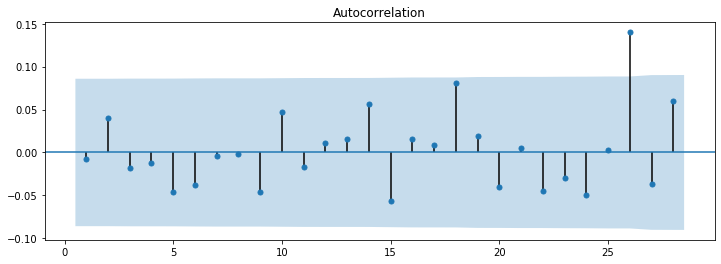

In [43]:
plt.figure(figsize=(12, 4))
plot_acf(res.std_resid**2, ax=plt.gca(), zero=False)
plt.show()

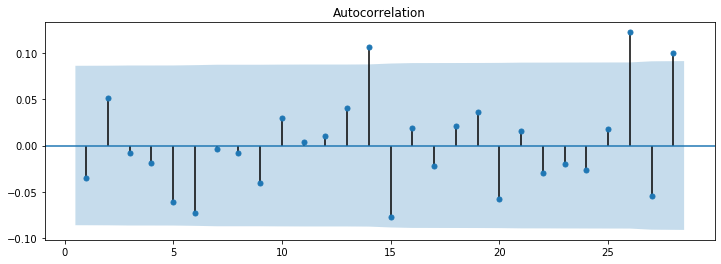

In [44]:
plt.figure(figsize=(12, 4))
plot_acf(abs(res.std_resid), ax=plt.gca(), zero=False)
plt.show()

The model residuals do not display correlation (other than some potentially spurious values at high lags).

**(e)**

In [45]:
# Rescale back by scale^2
conditional_variance = res.conditional_volatility / (scale**2)

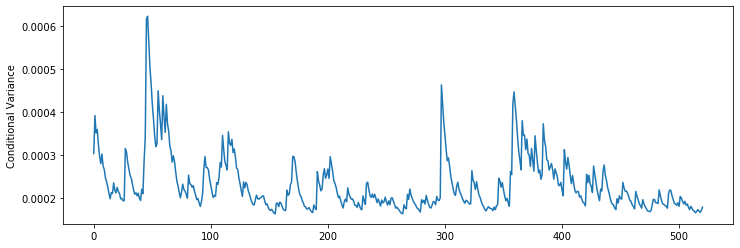

In [46]:
plt.figure(figsize=(12, 4))
plt.plot(conditional_variance)
plt.ylabel('Conditional Variance')
plt.show()

The conditional variance presents volatility clustering and decay back to a long term value, as expected from a GARCH(1, 1) process.

**(f)**

In [47]:
from statsmodels.graphics.gofplots import qqplot

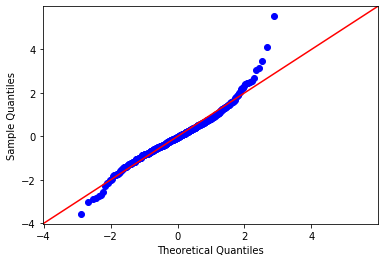

In [48]:
qqplot(res.std_resid, fit=True, line='45')
plt.show()

The residuals present heavier tails on both sides.

**(g)**  The 95% confidence interval for $b_1$ is $\hat{b}_1 \pm z_{\alpha/2} \sqrt{\text{Var}[\hat{b}_1]}$ -- but that confidence interval is already displayed on the summary statistics as (0.532,  0.995).

**(h)** According to the GARCH(1, 1) model, the stationary variance is

$$ \frac{\hat{\omega}}{1 - \hat{\alpha} - \hat{\beta}} \approx 5.833\text{e-}04 $$

In [49]:
# Rescale based on parameter scaling
omega_hat = res.params['omega'] / (scale**2)
alpha_hat, beta_hat = res.params['alpha[1]'], res.params['beta[1]']

omega_hat / (1 - alpha_hat - beta_hat)

0.000583314233356814

which is close to the variance of the raw data, 5.694e-04:

In [50]:
np.var(Y)

0.0005683028889772966

The stationary mean of the mean plus GARCH(1, 1) model is the same as the stationary mean of the returns itself, 0.002686:

In [51]:
np.mean(Y)

0.0026855887758157394

**(i)**  We can use Monte-Carlo simulations to estimate the prediction interval distributions.

In [52]:
from scipy.stats import norm
from tqdm import tqdm_notebook

In [53]:
mean_r = np.mean(Y)
B = 10000
step = 5
returnm = np.empty((B, step))

np.random.seed(0)

sigma2_lag1_initial = np.array(conditional_variance)[-1]
sq_return_lag1_initial = np.array(Y)[-1]**2

for j in tqdm_notebook(range(B), 'Monte Carlo'):
    sigma2_lag1 = sigma2_lag1_initial
    sq_return_lag1 = sq_return_lag1_initial
    
    # inner loop simulate from the 1 to 5 step ahead predictive distributions
    for i in range(step):
        
        # compute sigma^2_{t|t-1} recursively
        sigma2 = omega_hat + beta_hat * sigma2_lag1 + alpha_hat * sq_return_lag1
        
        # draw a realization from the i-step ahead distribution
        new_return = norm.rvs(size=1, loc=0, scale=np.sqrt(sigma2))
        
        returnm[j, i] = new_return
        sigma2_lag1 = sigma2
        sq_return_lag1 = new_return**2
    
returnm += mean_r

pd.DataFrame(
    data=np.quantile(returnm, axis=0, q=[.025, .975]),
    index=['lower', 'upper'],
    columns=['p1', 'p2', 'p3', 'p4', 'p5']
)

,p1,p2,p3,p4,p5
lower,-0.036099,-0.036811,-0.038912,-0.038400,-0.038664
upper,0.041163,0.041622,0.042554,0.043085,0.044061


The estimated 95% confidence interval for the 5th prediction is (-0.0386, 0.0441).